# Color from scheme

There is a description of plotly colors <a href="https://plotly.com/python/builtin-colorscales/">here</a>. But I haven't found any information about extracting colours from a colour scheme in hex or rgb form. However, there are some features that provide such an option.. There is official documentation for <a href="https://plotly.com/python-api-reference/generated/plotly.express.colors.html">them</a>.

The following example shows this operation for the `RdYlGn_r` colour scale:

- In the first step we got a colour scale by name from the function `plotly.colors.get_colorscale`, it will be a list of tuples in the format `(number, colour)` - looks like it's a way to describe colour schemes  in plotly;
- By using `sample_colorscale` we can get more colors including intermediate states between colours specified in the colour scheme;
- In the end, a set of colours was visualised.

,,
0,0.0,"rgb(0,104,55)"
1,0.1,"rgb(26,152,80)"
2,0.2,"rgb(102,189,99)"
3,0.3,"rgb(166,217,106)"
4,0.4,"rgb(217,239,139)"
5,0.5,"rgb(255,255,191)"
6,0.6,"rgb(254,224,139)"
7,0.7,"rgb(253,174,97)"
8,0.8,"rgb(244,109,67)"
9,0.9,"rgb(215,48,39)"


rgb(0, 104, 55)
rgb(14, 129, 68)
rgb(30, 154, 81)
rgb(70, 173, 91)
rgb(109, 192, 100)
rgb(142, 207, 103)
rgb(174, 220, 111)
rgb(201, 232, 129)
rgb(225, 242, 150)
rgb(245, 251, 177)
rgb(255, 247, 177)
rgb(254, 231, 150)
rgb(254, 208, 126)
rgb(253, 182, 104)
rgb(250, 150, 86)
rgb(245, 116, 70)
rgb(232, 83, 55)
rgb(217, 51, 40)
rgb(191, 25, 39)
rgb(165, 0, 38)


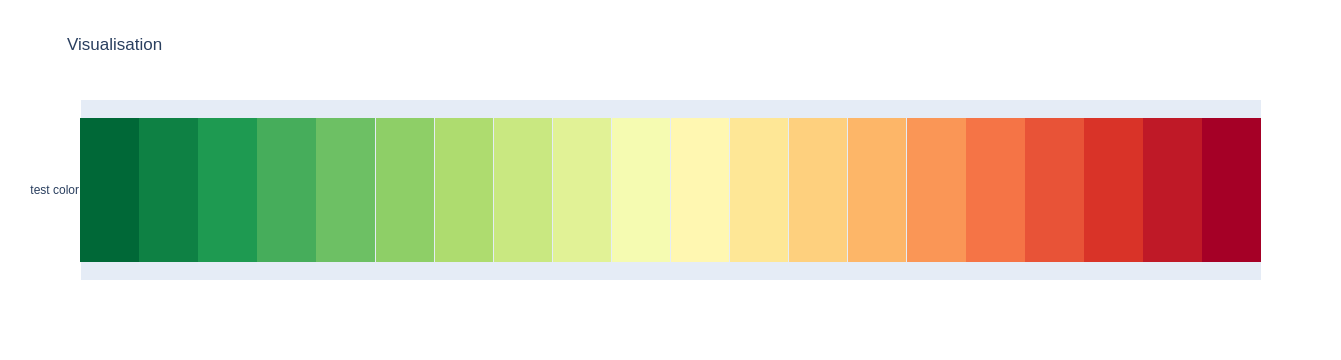

In [46]:
import numpy as np
import pandas as pd
import plotly as pltly

import plotly.graph_objects as go

from IPython.display import HTML

# extracting colorscale
colorscale = pltly.colors.get_colorscale('RdYlGn_r')
display(HTML("<text style='font-size:20px'>Color scale</text>"))
display(pd.DataFrame(colorscale, columns = ["", ""]))

# creating sample basend on colorscale
sample_colorscale = pltly.colors.sample_colorscale(
    colorscale,
    np.linspace(0, 1, 20)
)
display(HTML("<text style='font-size:20px'>Sample color scale</text>"))
for col in sample_colorscale:
    print(col)


# sample visualisation
display(HTML("<text style='font-size:20px'></text>"))
go.Figure(
    [
        go.Bar(
            orientation = "h",
            y = ["test color"],
            x = [1],
            marker = dict(color = col),
            hovertemplate="%{hovertext}<extra></extra>",
            hovertext=[col]
        )
        for col in sample_colorscale
    ],
    layout=dict(
        barmode = "stack",
        xaxis = dict(
            range=[0,len(sample_colorscale)],
            showticklabels=False, 
            showgrid=False
        ),
        showlegend=False,
        title = "Visualisation",
        dragmode = False
    )
).show()